In [1]:
import os
import pandas as pd

/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_28419/3571106454.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
os.getcwd()
os.listdir()

['.DS_Store',
 'model_evaluations.xlsx',
 'best_model.pkl',
 'model_desarrollo.ipynb',
 'datos_limpios.csv',
 'limpieza_y_alistamiento_revisado.ipynb',
 'data.txt']

In [4]:
df=pd.read_csv('datos_limpios.csv')
df.sample(30)

,date,department,day,team,targeted_productivity,smv,over_time,incentive,actual_productivity,dia_del_año,no_of_workers_redondeado
882,2015-02-22,sweing,Sunday,5,0.80,30.10,5700,0,0.307501,53,60
346,2015-01-20,sweing,Tuesday,11,0.70,14.89,10260,50,0.700170,20,57
198,2015-01-12,sweing,Monday,1,0.80,26.16,8220,75,0.850522,12,59
790,2015-02-16,sweing,Monday,5,0.80,30.10,0,0,0.800980,47,59
863,2015-02-19,sweing,Thursday,10,0.70,19.68,5760,0,0.249417,50,48
380,2015-01-22,sweing,Thursday,5,0.70,20.40,10440,40,0.700251,22,58
364,2015-01-21,sweing,Wednesday,1,0.65,22.94,10260,34,0.700030,21,57
104,2015-01-07,finishing,Wednesday,1,0.80,3.94,1440,0,0.951420,7,8
1063,2015-03-04,finishing,Wednesday,5,0.70,4.60,960,0,0.592083,63,8
939,2015-02-25,sweing,Wednesday,1,0.65,22.53,5040,0,0.581131,56,42


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1197 non-null   object 
 1   department                1197 non-null   object 
 2   day                       1197 non-null   object 
 3   team                      1197 non-null   int64  
 4   targeted_productivity     1197 non-null   float64
 5   smv                       1197 non-null   float64
 6   over_time                 1197 non-null   int64  
 7   incentive                 1197 non-null   int64  
 8   actual_productivity       1197 non-null   float64
 9   dia_del_año               1197 non-null   int64  
 10  no_of_workers_redondeado  1197 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 103.0+ KB


In [6]:
#
# 1. explicativo
#

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_sample=df.copy()

In [8]:
!pip3 install statsmodels


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [9]:
import statsmodels.api as sm

# Preparing the data for multivariate regression
X = df_sample[['incentive', 'no_of_workers_redondeado']]
y = df_sample['actual_productivity']
X = sm.add_constant(X)  # adding a constant

# Fitting the model
model = sm.OLS(y, X).fit()

# Getting the summary of the model
model_summary = model.summary()
model_summary
#
model_summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.7488,0.009,80.136,0.000,0.730,0.767
incentive,8.672e-05,3.14e-05,2.761,0.006,2.51e-05,0.000
no_of_workers_redondeado,-0.0005,0.000,-2.173,0.030,-0.001,-4.79e-05


In [10]:
df_sample.columns

Index(['date', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'actual_productivity', 'dia_del_año',
       'no_of_workers_redondeado'],
      dtype='object')

In [11]:
df_sample["department"]=[_.strip() for _ in  df_sample["department"]]
df_sample["department"].value_counts()
#
df_sample["day"].value_counts()
#
df_sample["team"].value_counts()

team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64

In [12]:
import pandas as pd

# Assuming df_sample is your DataFrame
# Apply one-hot encoding to 'department' and 'day' with k-1 columns
df_encoded = pd.get_dummies(df_sample, columns=['department', 'day', "team"], drop_first=True)

# Display the first few rows of the new DataFrame
df_encoded.sample(30)

,date,targeted_productivity,smv,over_time,incentive,actual_productivity,dia_del_año,no_of_workers_redondeado,department_sweing,day_Saturday,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
714,2015-02-11,0.80,22.52,0,113,1.000066,42,57,True,False,...,False,False,False,False,False,False,False,False,False,False
755,2015-02-14,0.80,3.94,1440,0,0.796208,45,12,False,True,...,False,False,False,False,False,False,False,False,False,False
149,2015-01-10,0.75,4.15,2760,0,0.930340,10,12,False,True,...,True,False,False,False,False,False,False,False,False,False
633,2015-02-05,0.07,24.26,6960,0,0.522845,36,58,True,False,...,False,False,False,False,True,False,False,False,False,False
1115,2015-03-08,0.80,30.10,3360,50,0.800511,67,57,True,False,...,True,False,False,False,False,False,False,False,False,False
318,2015-01-19,0.70,4.30,5040,0,0.977273,19,28,False,False,...,False,True,False,False,False,False,False,False,False,False
498,2015-01-29,0.80,22.52,6840,113,1.000230,29,57,True,False,...,False,False,False,False,False,False,False,False,False,False
667,2015-02-08,0.75,10.05,3240,45,0.750028,39,27,True,False,...,False,False,False,False,False,False,False,False,True,False
1116,2015-03-08,0.80,15.26,4080,63,0.800402,67,34,True,False,...,False,False,False,False,False,False,False,False,False,True
1107,2015-03-08,0.80,4.60,1080,0,0.945556,67,9,False,False,...,False,False,False,False,False,False,False,False,False,True


In [13]:
try:
    df_encoded.drop(["date"],axis=1, inplace=True)
except:
    pass
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   targeted_productivity     1197 non-null   float64
 1   smv                       1197 non-null   float64
 2   over_time                 1197 non-null   int64  
 3   incentive                 1197 non-null   int64  
 4   actual_productivity       1197 non-null   float64
 5   dia_del_año               1197 non-null   int64  
 6   no_of_workers_redondeado  1197 non-null   int64  
 7   department_sweing         1197 non-null   bool   
 8   day_Saturday              1197 non-null   bool   
 9   day_Sunday                1197 non-null   bool   
 10  day_Thursday              1197 non-null   bool   
 11  day_Tuesday               1197 non-null   bool   
 12  day_Wednesday             1197 non-null   bool   
 13  team_2                    1197 non-null   bool   
 14  team_3  

In [14]:
indenpendent_vars=[_ for _ in df_encoded.columns if _!='actual_productivity' ]
indenpendent_vars

['targeted_productivity',
 'smv',
 'over_time',
 'incentive',
 'dia_del_año',
 'no_of_workers_redondeado',
 'department_sweing',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday',
 'team_2',
 'team_3',
 'team_4',
 'team_5',
 'team_6',
 'team_7',
 'team_8',
 'team_9',
 'team_10',
 'team_11',
 'team_12']

In [15]:
import numpy as np
import statsmodels.api as sm

# Asegurarse de que los datos sean numéricos y no contengan valores faltantes
df_encoded = df_encoded.astype(float).dropna()

# Preparar los datos para la regresión multivariada
X = df_encoded[indenpendent_vars]
y = df_encoded['actual_productivity']
X = sm.add_constant(X)  # añadir una constante

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Obtener el resumen del modelo
model_summary = model.summary()

# Acceder a la Tabla 1 del resumen
table1 = model_summary.tables[1]
print(table1)


                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3319      0.042      7.917      0.000       0.250       0.414
targeted_productivity        0.6822      0.046     14.802      0.000       0.592       0.773
smv                         -0.0072      0.001     -6.965      0.000      -0.009      -0.005
over_time                -4.543e-06   2.06e-06     -2.203      0.028   -8.59e-06   -4.97e-07
incentive                 6.787e-05   2.75e-05      2.471      0.014     1.4e-05       0.000
dia_del_año                 -0.0010      0.000     -4.328      0.000      -0.001      -0.001
no_of_workers_redondeado     0.0051      0.001      5.804      0.000       0.003       0.007
department_sweing           -0.0758      0.034     -2.224      0.026      -0.143      -0.009
day_Saturday                 0.0179      0.015      1.174      0.241  

In [16]:
pip install lxml


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
from io import StringIO
#
table_output=model_summary.tables[1]
# Assuming 'table_output' is your SimpleTable object
html_table = table_output.as_html()
df_list = pd.read_html(StringIO(html_table))

# Convert the list of DataFrames to a single DataFrame
# (Assuming there's only one table in the list)
table_output = df_list[0]
table_output

# Assuming table_output is your DataFrame
# Set the first column as the index (variable names)
table_output.columns=table_output.iloc[0]

# Rename the first column to 'parameters'
table_output.rename(columns={table_output.columns[0]: 'parameters'}, inplace=True)

# Filter the DataFrame to include only the rows with 'incentive' or 'no_of_workers_redondeado' in 'parameters' column
filtered_table = table_output[table_output['parameters'].isin(["incentive", "no_of_workers_redondeado"])]
filtered_table

,parameters,coef,std err,t,P>|t|,[0.025,0.975]
5,incentive,6.787e-05,2.75e-05,2.471,0.014,1.4e-05,0.000
7,no_of_workers_redondeado,0.0051,0.001,5.804,0.000,0.003,0.007


In [18]:
#
# 2. predictivo
#

<Axes: >

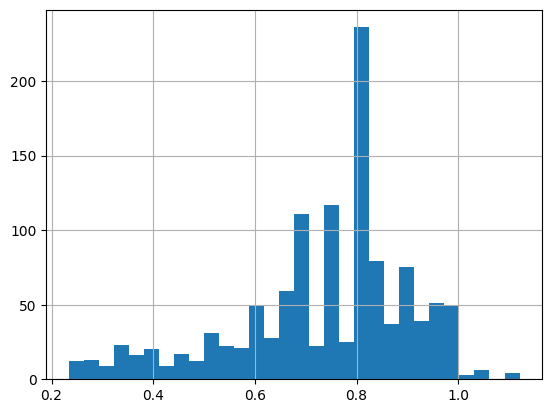

In [19]:
df_encoded["actual_productivity"].hist(bins=30)

In [20]:
model_data=df_encoded.copy()
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   targeted_productivity     1197 non-null   float64
 1   smv                       1197 non-null   float64
 2   over_time                 1197 non-null   float64
 3   incentive                 1197 non-null   float64
 4   actual_productivity       1197 non-null   float64
 5   dia_del_año               1197 non-null   float64
 6   no_of_workers_redondeado  1197 non-null   float64
 7   department_sweing         1197 non-null   float64
 8   day_Saturday              1197 non-null   float64
 9   day_Sunday                1197 non-null   float64
 10  day_Thursday              1197 non-null   float64
 11  day_Tuesday               1197 non-null   float64
 12  day_Wednesday             1197 non-null   float64
 13  team_2                    1197 non-null   float64
 14  team_3  

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming model_data is your DataFrame
# Splitting the data into features (X) and target (y)
X = model_data.drop('actual_productivity', axis=1)
y = model_data['actual_productivity']

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2024-03-10 19:56:48.834071: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# Building the ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Single hidden layer with 32 neurons
    Dense(1,  activation='linear')  # Output layer for regression (linear activation)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32)
#
from sklearn.metrics import r2_score
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"Out-of-Sample R²: {r2}")

Epoch 1/50
30/30 [==============================] - 1s 3ms/step - loss: 0.3561
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.1580
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.1068
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0863
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.0730
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.0620
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 0.0546
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 0.0443
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0404
Epoch 11/50
30/30 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 12/50
30/30 [==============================] - 0s 3ms/step - loss: 0.0350
Epoch 13/50
30/30 [==============================

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building the ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Single hidden layer with 32 neurons
    Dense(1,  activation='linear')  # Output layer for regression (linear activation)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32)
#
from sklearn.metrics import r2_score
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"Out-of-Sample R²: {r2}")


# Building the ANN model with two hidden layers
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer with 32 neurons
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    Dense(1,  activation='linear')  # Output layer for regression (linear activation)
])

# Compiling the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model2.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

# Making predictions and evaluating the model
y_pred2 = model2.predict(X_test_scaled)
r2_2 = r2_score(y_test, y_pred2)
print(f"Out-of-Sample R² for model2: {r2_2}")

Epoch 1/50
30/30 [==============================] - 1s 2ms/step - loss: 0.7844
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3101
Epoch 3/50
30/30 [==============================] - 0s 7ms/step - loss: 0.1733
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.1255
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.1019
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0856
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0729
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0498
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0450
Epoch 12/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0413
Epoch 13/50
30/30 [==============================

In [24]:
pip install openpyxl


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

def save_optimal_model(n_epochs, X_train_scaled, y_train, X_test_scaled, y_test):
    # Define the first model
    model1 = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(1, activation='linear')
    ])
    model1.compile(optimizer='adam', loss='mean_squared_error')
    model1.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=32)
    y_pred1 = model1.predict(X_test_scaled)
    r2_1 = r2_score(y_test, y_pred1)
    gist_1 = "1 Layer: 32 Neurons (ReLU)"

    # Define the second model
    model2 = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model2.compile(optimizer='adam', loss='mean_squared_error')
    model2.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=32)
    y_pred2 = model2.predict(X_test_scaled)
    r2_2 = r2_score(y_test, y_pred2)
    gist_2 = "2 Layers: 32 Neurons each (ReLU)"

    # Create DataFrame with evaluations
    evaluations = pd.DataFrame({'Model': ['Model 1', 'Model 2'], 
                                'Out-of-Sample R²': [r2_1, r2_2],
                                'Model Gist': [gist_1, gist_2]})
    # Export to Excel
    evaluations.to_excel('model_evaluations.xlsx', index=False)

    # Save the optimal model
    best_model = model1 if r2_1 > r2_2 else model2
    with open('best_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)

    return evaluations


# Example usage
evaluations = save_optimal_model(50, X_train_scaled, y_train, X_test_scaled, y_test)
# Note: Make sure X_train_scaled, y_train, X_test_scaled, y_test are defined

Epoch 1/50


30/30 [==============================] - 1s 2ms/step - loss: 1.6122
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5906
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2685
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.1664
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.1212
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0952
Epoch 7/50
30/30 [==============================] - 0s 9ms/step - loss: 0.0796
Epoch 8/50
30/30 [==============================] - 0s 5ms/step - loss: 0.0687
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 0.0606
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 11/50
30/30 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 12/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0458
Epoch 13/50
30/30 [==============================] - 0s 8ms/